# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

__Вторая часть задания про градиентный бустинг и третья про SVM ждут вас в соседних ноутбуках.__

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [0]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,435,85,37,68,145,60,6,130,51,18,130,150,253,121,65,3,14,195,203
1,637,86,44,65,129,56,6,152,45,19,150,168,331,177,83,4,13,178,183
2,605,97,53,105,225,71,12,221,30,25,167,226,713,202,70,3,20,186,200
3,446,101,52,101,197,62,9,188,35,22,162,208,527,203,67,14,15,193,202
4,678,86,45,70,122,56,7,148,45,19,144,170,324,186,84,9,5,180,183
5,579,84,38,66,138,62,6,126,54,18,132,144,232,139,70,4,7,185,190
6,815,81,45,68,154,69,22,151,45,19,147,186,335,186,88,1,10,180,185
7,780,109,47,96,206,64,9,198,33,23,150,219,586,191,70,4,13,190,198
8,590,84,44,65,128,55,8,150,46,19,148,169,325,176,82,1,11,179,183
9,555,87,49,86,190,64,9,177,37,21,153,197,471,209,67,11,7,192,199


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [0]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,410.683060,93.723133,44.901639,82.599271,169.888889,61.870674,8.590164,168.821494,40.912568,20.586521,148.187614,188.754098,439.803279,174.734062,72.174863,6.315118,12.821494,189.218579,196.038251
std,240.416453,8.161901,6.166292,15.754610,33.709315,8.244421,4.477598,33.089585,7.741466,2.574843,14.479136,31.259037,175.938115,32.915041,7.558194,5.005195,9.067922,6.195090,7.460382
min,0.000000,76.000000,34.000000,44.000000,110.000000,47.000000,2.000000,114.000000,26.000000,17.000000,120.000000,134.000000,194.000000,109.000000,59.000000,0.000000,0.000000,177.000000,181.000000
25%,194.000000,88.000000,40.000000,70.000000,142.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,320.000000,149.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,413.000000,93.000000,44.000000,79.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,610.000000,100.000000,49.000000,100.000000,195.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,598.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,112.000000,333.000000,138.000000,52.000000,262.000000,59.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [0]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [0]:
### YOUR CODE HERE

#from sklearn.preprocessing import minmax_scale

#Normalize data

#X_train = minmax_scale(X_train)
#X_test = minmax_scale(X_test)

def give_pipe(estimator_):
    #my_estimator = estimator_()
    return Pipeline([('std_scaler', StandardScaler()), ('estimator', estimator_)])


549

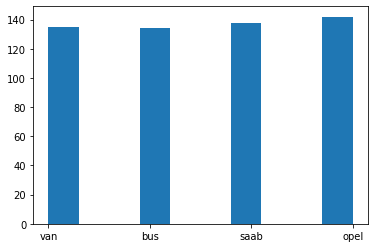

In [0]:
#Let's have a look at class distribution
import matplotlib.pyplot as plt

plt.hist(y_train)
# We can see that there ist't any dominant class in dataset. 

len(y_train)


#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
pipeline = give_pipe(LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000))
pipeline.get_params()

{'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=10000,
                    multi_class='multinomial', n_jobs=None, penalty='l2',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 10000,
 'estimator__multi_class': 'multinomial',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'saga',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'memory': None,
 'std_scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'std_scaler__copy': True,
 'std_scaler__with_mean': True,
 'std_scaler__with_std': True,
 's

In [0]:
### YOUR CODE HERE
param_to_fit = {'estimator__C':np.linspace(0.01, 100, 10), 'estimator__penalty':['l1', 'l2']}
clf = GridSearchCV(estimator=pipeline, param_grid=param_to_fit, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('std_scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('estimator',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=10000,
                                                           multi

In [0]:
#Try to choose opt params
res = clf.cv_results_

l1_score = [x for i, x in enumerate(res['mean_test_score']) if res['param_estimator__penalty'][i] == 'l1']
l2_score = [x for i, x in enumerate(res['mean_test_score']) if res['param_estimator__penalty'][i] == 'l2']

C = clf.param_grid['estimator__C']


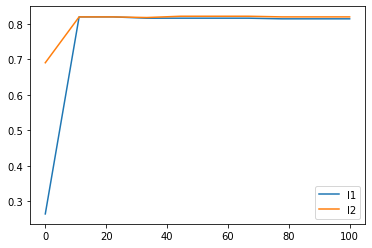

In [0]:
import matplotlib.pyplot as plt

plt.plot(C, l1_score, label='l1')
plt.plot(C, l2_score, label="l2")
plt.legend()

##Заключаем , что оптимально брать l1  и С ~ 15

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


clf = give_pipe(LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000, C=20, penalty='l2'))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 LogisticRegression(C=20, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
#print(X_test.shape)
#X_test = minmax_scale(X_test)
#print(f1_score(y_test, clf.predict(X_test), average=None))
#print("По всем классам :", f1_score(y_test, clf.predict(X_test), average='micro'))



In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_true = clf.predict(X_test) == y_test
y_score = list(map(np.max, clf.decision_function(X_test)))
print(f1_score(y_test, clf.predict(X_test), average='micro'))
print(f1_score(y_test, clf.predict(X_test), average=None))
print("Precision : ", precision_score(y_test, clf.predict(X_test), average='micro'), "Recall : ", recall_score(y_test, clf.predict(X_test), average='micro'))

0.7946127946127947
[0.93975904 0.63013699 0.68       0.92424242]
Precision :  0.7946127946127947 Recall :  0.7946127946127947


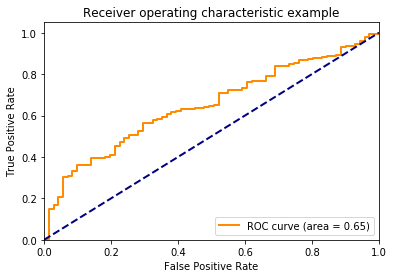

In [0]:
y_true = clf.predict(X_test) == y_test
y_score = list(map(np.max, clf.decision_function(X_test)))



(fpr, tpr, _) = roc_curve(y_true, y_score)

roc_auc = roc_auc_score(y_true, y_score)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

In [0]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

exp_var_rat = []
pca = PCA(n_components=19)
scaler = StandardScaler()
pca.fit(scaler.fit_transform(X_train))
exp_var_rat = trans_pca.explained_variance_ratio_


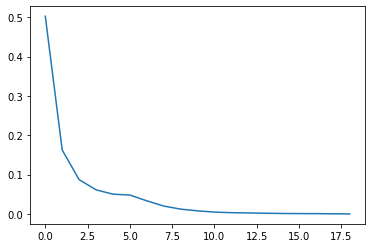

In [0]:
plt.plot(np.linspace(0, 18, 19), [x for x in exp_var_rat])


#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

In [0]:
### YOUR CODE HERE
print(exp_var_rat[10])
#So we can see that we'll lose on;y 0.4% if we take only 10 components

0.004658474740986591


#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [0]:
### YOUR CODE HERE

#Get 5 eigenvectors

#print(trans_pca.components_[:4], eigens.transpose())

#Transform out X_train and X_test
pca = PCA(n_components=10)
X_train_comp = pca.fit_transform(scaler.fit_transform(X_train))
X_test_comp = pca.fit_transform(scaler.fit_transform(X_test))


#GridSearch our regressson

param_to_fit = {'estimator__C':np.linspace(0.01, 20, 10), 'estimator__penalty':['l1', 'l2']}
pipeline = give_pipe(estimator_=LogisticRegression(solver='saga', multi_class='multinomial', max_iter=5000))
clf = GridSearchCV(pipeline, param_grid=param_to_fit, cv=5, scoring='accuracy')
clf.fit(X_train_comp, y_train)





/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('std_scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('estimator',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=5000,
                                                           multi_

In [0]:
#Try to choose opt params
res = clf.cv_results_

l1_score = [x for i, x in enumerate(res['mean_test_score']) if res['param_estimator__penalty'][i] == 'l1']
l2_score = [x for i, x in enumerate(res['mean_test_score']) if res['param_estimator__penalty'][i] == 'l2']

C = clf.param_grid['estimator__C']


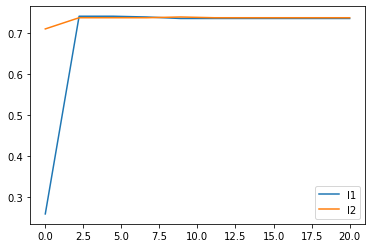

In [0]:
import matplotlib.pyplot as plt

plt.plot(C, l1_score, label='l1')
plt.plot(C, l2_score, label="l2")
plt.legend()

##Заключаем , что оптимально брать l2  и С ~ 20

In [0]:
clf = give_pipe(LogisticRegression(solver='saga', multi_class='multinomial', max_iter=5000, C=20, penalty='l2'))
clf.fit(X_train_comp, y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 LogisticRegression(C=20, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
print(f1_score(y_test, clf.predict(X_test_comp), average=None))
print("По всем классам :", f1_score(y_test, clf.predict(X_test_comp), average='micro'))



[0.71328671 0.375      0.50306748 0.703125  ]
По всем классам : 0.5622895622895623


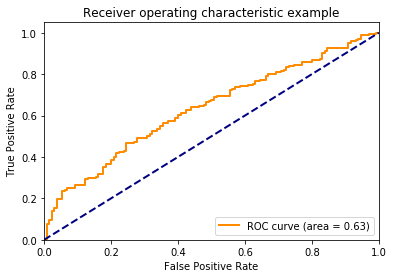

In [0]:
y_true = clf.predict(X_test_comp) == y_test
y_score = list(map(np.max, clf.decision_function(X_test_comp)))

(fpr, tpr, _) = roc_curve(y_true, y_score)

roc_auc = roc_auc_score(y_true, y_score)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [0]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, accuracy_score 

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

#YOUR CODE HERE


In [0]:
gs_algo = GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth' : range(10, 20)}, scoring='accuracy')
gs_algo.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(10, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             s

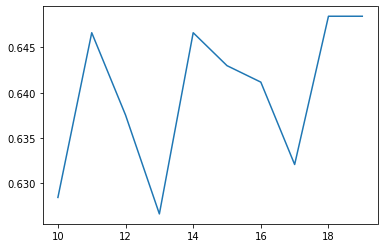

In [0]:
plt.plot(range(10, 20), gs_algo.cv_results_['mean_test_score'].astype(np.float64))

#Let's take max_depth = 17

In [0]:
my_tree = DecisionTreeClassifier(max_depth=17)
my_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
y_true = my_tree.predict(X_test) == y_test
print(f1_score(y_test, my_tree.predict(X_test), average='micro'))
print(f1_score(y_test, my_tree.predict(X_test), average=None))
print('Accuracy = ', accuracy_score(y_test, my_tree.predict(X_test)))

0.6531986531986532
[0.86624204 0.5        0.48780488 0.7751938 ]
Accuracy =  0.6531986531986532


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


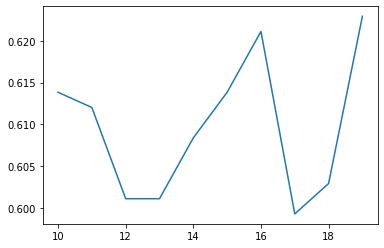

In [0]:
##Let's have a look at cutted data

gs_algo = GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth' : range(10, 20)}, scoring='accuracy')
gs_algo.fit(X_train_comp, y_train)
plt.plot(range(10, 20), gs_algo.cv_results_['mean_test_score'].astype(np.float64))


In [0]:
my_tree = DecisionTreeClassifier(max_depth=16)
my_tree.fit(X_train_comp, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_true = my_tree.predict(X_test_comp) == y_test
print(f1_score(y_test, my_tree.predict(X_test_comp), average='micro'))
print(f1_score(y_test, my_tree.predict(X_test_comp), average=None))
print('Accuracy = ', accuracy_score(y_test, my_tree.predict(X_test_comp)))

0.4983164983164983
[0.62025316 0.40789474 0.39751553 0.58536585]
Accuracy =  0.4983164983164983


#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [0]:
from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm_notebook 
esnsembles = []
## Logistic regression
for i in tqdm_notebook(range(1, 51)):
  pipeline = BaggingClassifier(base_estimator=give_pipe(LogisticRegression(solver='saga', multi_class='multinomial', max_iter=5000, C=20, penalty='l2')), n_estimators=i)
  pipeline.fit(X_train, y_train)
  print("alive")
  esnsembles.append(pipeline)
  
  

50


Text(0.5, 1.0, 'F1_score')

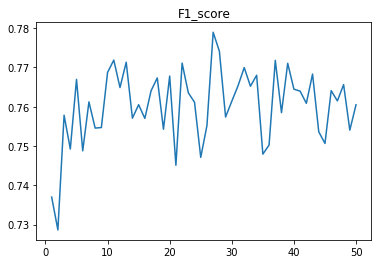

In [0]:
f1_scores = [f1_score(ens.predict(X_test), y_test, average='macro') for ens in esnsembles]
print(len(esnsembles))
plt.plot(range(1, 51), f1_scores)
plt.title("F1_score")

Text(0.5, 1.0, 'accuracy_score')

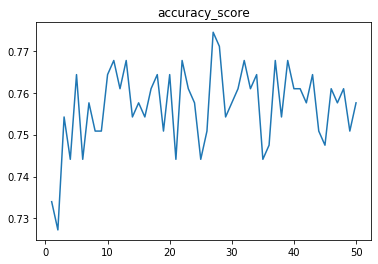

In [0]:
accuracy_scores = [accuracy_score(ens.predict(X_test), y_test) for ens in esnsembles]
plt.plot(range(1, 51), accuracy_scores)

plt.title("accuracy_score")

In [0]:
#Now we gonna deal with treees
trees = []
for i in tqdm_notebook(range(1, 51)):
  pipeline = give_pipe(BaggingClassifier(DecisionTreeClassifier(max_depth=16), n_estimators=i))
  pipeline.fit(X_train, y_train)
  trees.append(pipeline)

Text(0.5, 1.0, 'F1_score')

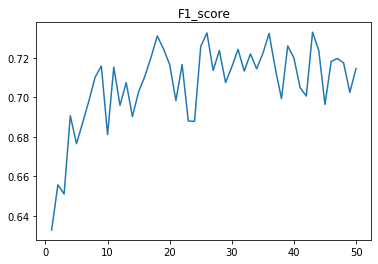

In [0]:
f1_scores = [f1_score(tree.predict(X_test), y_test, average='micro') for tree in trees]
plt.plot(range(1, 51), f1_scores)
plt.title("F1_score")

Text(0.5, 1.0, 'Accuracy')

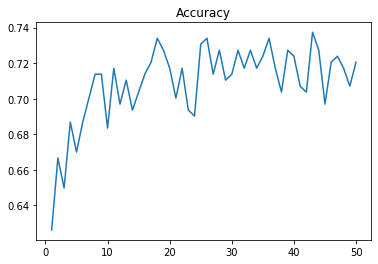

In [0]:
accuracy_scores = [accuracy_score(tree.predict(X_test), y_test) for tree in trees]

plt.plot(range(1, 51), accuracy_scores)
plt.title("Accuracy")

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [0]:
from sklearn.ensemble import RandomForestClassifier

my_forests = []
for i in tqdm_notebook(range(1, 51)):
  my_forest = RandomForestClassifier(n_estimators=i)
  my_forest.fit(X_train, y_train)
  my_forests.append(my_forest)



Text(0.5, 1.0, 'F1_scores')

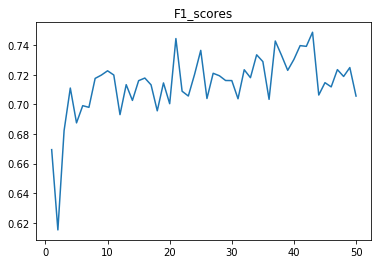

In [0]:
f1_scores = [f1_score(forest.predict(X_test), y_test, average='macro') for forest in my_forests]
plt.plot(range(1, 51), f1_scores)
plt.title("F1_scores")

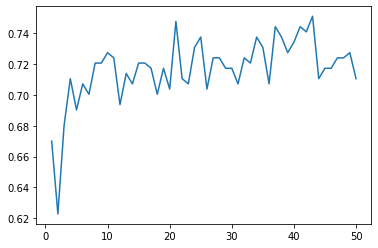

In [0]:
accuracy_scores = [accuracy_score(forest.predict(X_test), y_test) for forest in my_forests]
plt.plot(range(1, 51), accuracy_scores)

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [0]:
X_train_parts = []
y_train_parts = []

for i in range(10):
  X_train_parts.append(X_train[:int(X_train.shape[0] * (i + 1) / 10)])
  y_train_parts.append(y_train[:int(y_train.shape[0] * (i + 1) / 10)])
  X_train_parts[i] = np.asarray(X_train_parts[i])
  y_train_parts[i] = np.asarray(y_train_parts[i])
  print(X_train_parts[i].shape, y_train_parts[i].shape)




(54, 19) (54,)
(109, 19) (109,)
(164, 19) (164,)
(219, 19) (219,)
(274, 19) (274,)
(329, 19) (329,)
(384, 19) (384,)
(439, 19) (439,)
(494, 19) (494,)
(549, 19) (549,)


In [0]:
my_logit = give_pipe(LogisticRegression(solver='saga', multi_class='multinomial', max_iter=5000, C=20, penalty='l2'))
my_tree = give_pipe(DecisionTreeClassifier(max_depth=16))
my_bag_logit = give_pipe(BaggingClassifier(base_estimator=give_pipe(LogisticRegression(solver='saga', multi_class='multinomial', max_iter=5000, C=20, penalty='l2')), n_estimators=28))
my_bag_tree = BaggingClassifier(DecisionTreeClassifier(max_depth=16), n_estimators=40)
my_forest = RandomForestClassifier(n_estimators=43)
my_models = {'my_logit': my_logit, 'my_tree':my_tree, 'my_bag_logit':my_bag_logit, 'my_bag_tree':my_bag_tree, 'my_forest':my_forest}

In [0]:
test_f1_scores = {'my_logit':[], 'my_tree':[], 'my_bag_logit':[], 'my_bag_tree':[], 'my_forest':[]}
test_accuracy_scores = {'my_logit':[], 'my_tree':[], 'my_bag_logit':[], 'my_bag_tree':[], 'my_forest':[]}
train_f1_scores = {'my_logit':[], 'my_tree':[], 'my_bag_logit':[], 'my_bag_tree':[], 'my_forest':[]}
train_accuracy_scores = {'my_logit':[], 'my_tree':[], 'my_bag_logit':[], 'my_bag_tree':[], 'my_forest':[]}

for i in range(10):
  for model_name in my_models.keys():
    my_models[model_name].fit(X_train_parts[i], y_train_parts[i])
    test_f1_scores[model_name].append(f1_score(my_models[model_name].predict(X_test), y_test, average='macro')) 
    train_f1_scores[model_name].append(f1_score(my_models[model_name].predict(X_train), y_train, average='macro'))
    test_accuracy_scores[model_name].append(accuracy_score(my_models[model_name].predict(X_test), y_test))
    train_accuracy_scores[model_name].append(accuracy_score(my_models[model_name].predict(X_train), y_train))



Text(0.5, 1.0, 'F1_scores in test')

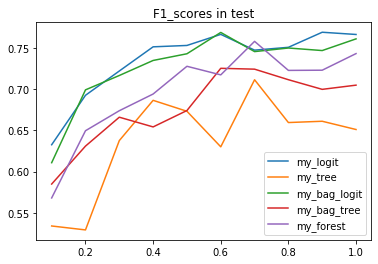

In [0]:
#test f1_score

for name in test_f1_scores.keys():
  plt.plot(np.linspace(0.1, 1, 10), test_f1_scores[name], label=name)
plt.legend()
plt.title("F1_scores in test")


Text(0.5, 1.0, 'F1_scores in train')

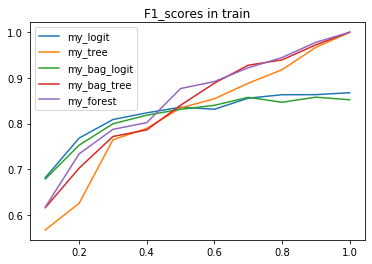

In [0]:
for name in train_f1_scores.keys():
  plt.plot(np.linspace(0.1, 1, 10), train_f1_scores[name], label=name)
plt.legend()
plt.title("F1_scores in train")

Text(0.5, 1.0, 'accuracy_scores in test')

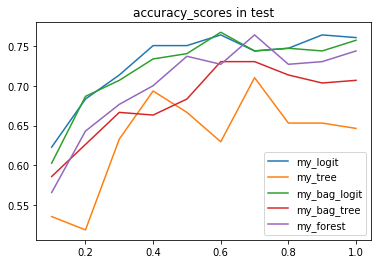

In [0]:
#test f1_score

for name in test_accuracy_scores.keys():
  plt.plot(np.linspace(0.1, 1, 10), test_accuracy_scores[name], label=name)
plt.legend()
plt.title("accuracy_scores in test")


Text(0.5, 1.0, 'accuracy_scores in test')

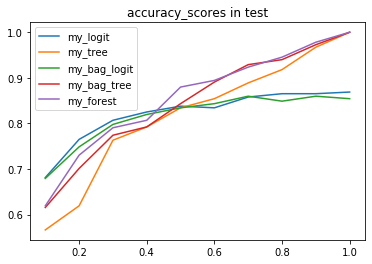

In [0]:

for name in train_accuracy_scores.keys():
  plt.plot(np.linspace(0.1, 1, 10), train_accuracy_scores[name], label=name)
plt.legend()
plt.title("accuracy_scores in test")


# Вывод
* Во-первых, мы можем видеть(в на протяжении всей лабы), что метрики accuracy и f1_score дают везде приблизительно одинаковый результат. Происходит это потому, что распределение классов в датасете примерно равномерное(что видно из диаграммы в начале), а также того, что значение полноты и точности примерно совпадают(см. результаты после первой лог-регресии).
* Во_вторых, из четырёх графиков выше мы можем сделать важное заключение: my_forest(он же Random Forest), бэггинг на деревьях а также само дерево элементарно переобучаются. Действительно, они достигают почти 100% показателей на X_train,  однако их метрики на тестовом датасете ниже, чем у лог-регресии и бэггинга над ней, хотя на train'e  у них результаты лучше. Из чего мы можем сделать вывод о том, что они ОЧЕНЬ сильно подгоняются под обучающую выборку. Их метрики перестают расти примерно после 0.5 от train'a, то есть после того, как они начали получать большее кол-во данных, они начали сильнее под них подгоняться и их обобщая способность скорее падала. 

